In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as dists
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, multivariate_normal
from tension_quantify import SoftHistogram

In [2]:
normal = dists.Normal(torch.tensor(1).float(), torch.tensor(1).float())
samples = normal.sample([10000])
samples = samples.unsqueeze(1)
min = samples.min()
max = samples.max()

In [3]:
n_bins = 20
hard_bins = torch.histc(samples, bins=n_bins, min=min, max=max)
hard_bw = (max - min) / n_bins
hard_centres = torch.linspace((min + hard_bw).item(), (max - hard_bw).item(), n_bins)

In [5]:
soft_g1 = SoftHistogram(n_bins, min, max, param=1, envelope="gaussian")
soft_g1_bins, soft_g1_centres = soft_g1(samples)

In [6]:
soft_5 = SoftHistogram(n_bins, min, max, param=5, envelope="sigmoid")
soft5_bins, soft5_centres = soft_5(samples)
soft_10 = SoftHistogram(n_bins, min, max, param=10, envelope="sigmoid")
soft10_bins, soft10_centres = soft_10(samples)

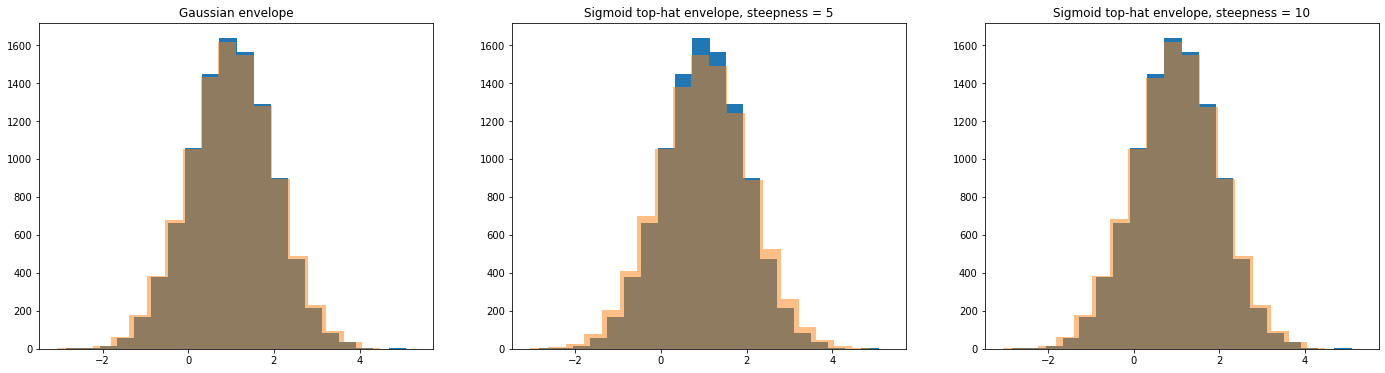

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
axs[0].bar(hard_centres.detach().numpy(), hard_bins.detach().numpy(), width=hard_bw)
axs[0].bar(soft_g1_centres.detach().numpy(), soft_g1_bins.detach().numpy(), width=hard_bw, lw=3, alpha=0.5)
axs[0].set_title("Gaussian envelope")

axs[1].bar(hard_centres.detach().numpy(), hard_bins.detach().numpy(), width=hard_bw)
axs[1].bar(soft5_centres.detach().numpy(), soft5_bins.detach().numpy(), width=hard_bw, lw=3, alpha=0.5)
axs[1].set_title("Sigmoid top-hat envelope, steepness = 5")

axs[2].bar(hard_centres.detach().numpy(), hard_bins.detach().numpy(), width=hard_bw)
axs[2].bar(soft10_centres.detach().numpy(), soft10_bins.detach().numpy(), width=hard_bw, lw=3, alpha=0.5)
axs[2].set_title("Sigmoid top-hat envelope, steepness = 10")

plt.show()